In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, filtfilt ,medfilt
# โหลดข้อมูล
reflect = pd.read_csv("first_glass.csv")
transparent = pd.read_csv("two_glass.csv")
moving = pd.read_csv("three_glass.csv")

# แปลง timestamp เป็น datetime
reflect['timestamp'] = pd.to_datetime(reflect['timestamp']) 
transparent['timestamp'] = pd.to_datetime(transparent['timestamp'])
moving['timestamp'] = pd.to_datetime(moving['timestamp'])

# คำนวณเวลาที่ผ่านไปจากจุดเริ่มต้น (เป็นวินาที)
reflect['elapsed_time'] = (reflect['timestamp'] - reflect['timestamp'].iloc[0]).dt.total_seconds()
transparent['elapsed_time'] = (transparent['timestamp'] - transparent['timestamp'].iloc[0]).dt.total_seconds()
moving['elapsed_time'] = (moving['timestamp'] - moving['timestamp'].iloc[0]).dt.total_seconds()

In [118]:
reflect['tof'] -= 100
transparent['tof'] -= 100

In [120]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w)/w, mode='same')

reflect['tof_ma5'] = moving_average(reflect['tof'], 5)
transparent['tof_ma5'] = moving_average(transparent['tof'], 5)
moving['tof_ma5'] = moving_average(moving['tof'], 5)

In [121]:
reflect['tof_med5'] = medfilt(reflect['tof'], kernel_size=5)
transparent['tof_med5'] = medfilt(transparent['tof'], kernel_size=5)
moving['tof_med5'] = medfilt(moving['tof'], kernel_size=5)

In [122]:
def low_pass_filter(data, cutoff, fs=100, order=4):
    nyq = 0.5 * fs
    norm_cutoff = cutoff / nyq
    b, a = butter(order, norm_cutoff, btype='low')
    return filtfilt(b, a, data)

reflect['tof_lp1'] = low_pass_filter(reflect['tof'], 1.0)
transparent['tof_lp1'] = low_pass_filter(transparent['tof'], 1.0)
moving['tof_lp1'] = low_pass_filter(moving['tof'], 1.0)

In [128]:
from sklearn.metrics import mean_absolute_error

ground_truth = 400

# MAE สำหรับ Moving Average
mae_ma5 = {
    'reflect': mean_absolute_error([ground_truth] * len(reflect), reflect['tof_ma5']),
    'transparent': mean_absolute_error([ground_truth] * len(transparent), transparent['tof_ma5']),
    'moving': mean_absolute_error([ground_truth] * len(moving), moving['tof_ma5'])
}

# MAE สำหรับ Median Filter
mae_med5 = {
    'reflect': mean_absolute_error([ground_truth] * len(reflect), reflect['tof_med5']),
    'transparent': mean_absolute_error([ground_truth] * len(transparent), transparent['tof_med5']),
    'moving': mean_absolute_error([ground_truth] * len(moving), moving['tof_med5'])
}

# MAE สำหรับ Low-pass Filter
mae_lp1 = {
    'reflect': mean_absolute_error([ground_truth] * len(reflect), reflect['tof_lp1']),
    'transparent': mean_absolute_error([ground_truth] * len(transparent), transparent['tof_lp1']),
    'moving': mean_absolute_error([ground_truth] * len(moving), moving['tof_lp1'])
}


In [134]:
print(f"MAE - Moving Average: {mae_ma5}")
print(f"MAE - Median Filter:  {mae_med5}")
print(f"MAE - Low-pass Filter: {mae_lp1}")

MAE - Moving Average: {'reflect': 12.161157024793395, 'transparent': 155.53855670103096, 'moving': 57.89406952965236}
MAE - Median Filter:  {'reflect': 11.561983471074381, 'transparent': 156.89072164948453, 'moving': 79.12883435582822}
MAE - Low-pass Filter: {'reflect': 28.423194510041675, 'transparent': 162.30880006337307, 'moving': 50.47433365232564}


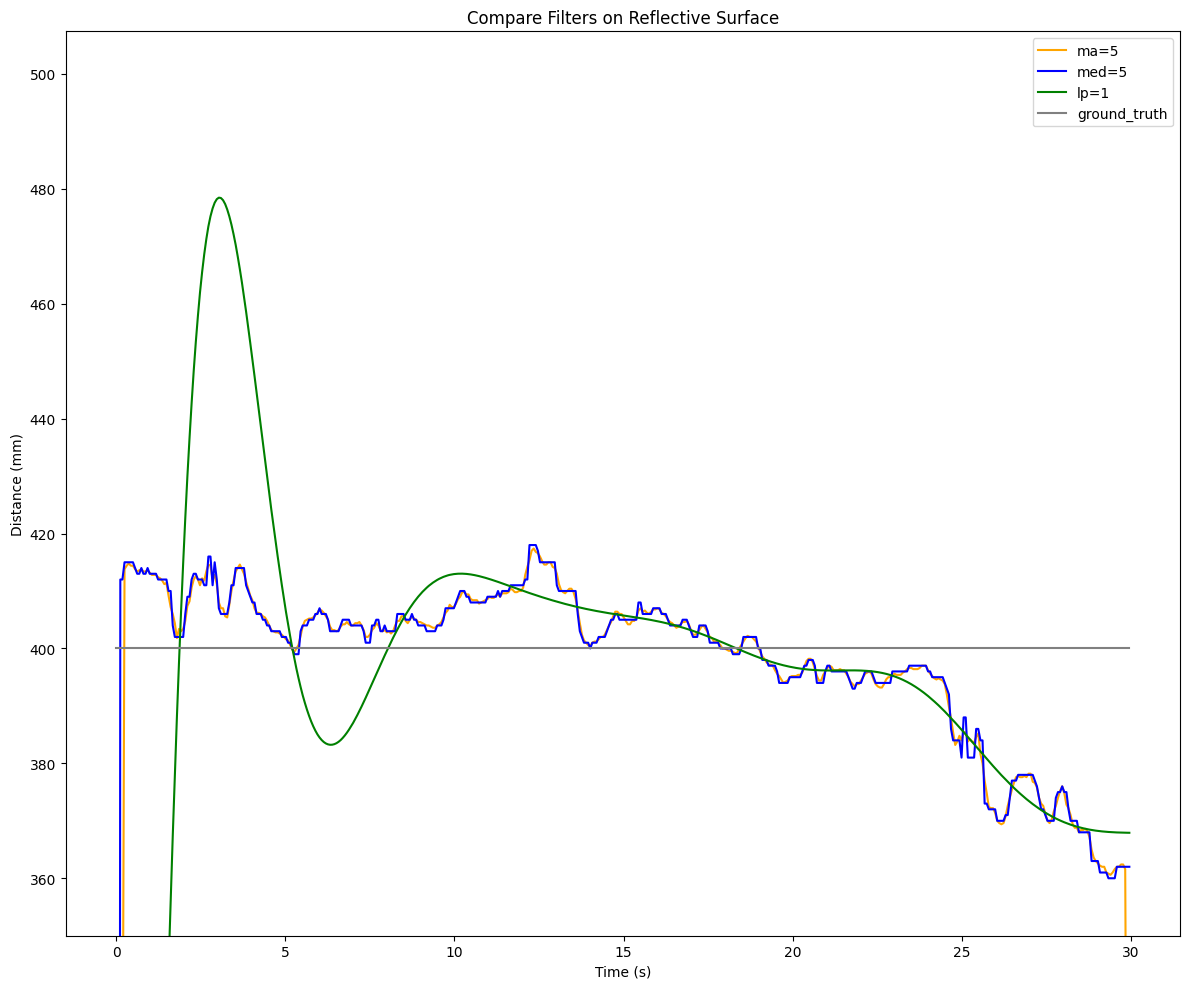

In [123]:
import numpy as np

plt.figure(figsize=(12, 10)) 
ground_truth = 400
gt_line = np.full_like(reflect['timestamp'], ground_truth, dtype=float)

plt.plot(reflect['elapsed_time'], reflect['tof_ma5'], label='ma=5', color='orange')
plt.plot(reflect['elapsed_time'], reflect['tof_med5'], label='med=5', color='blue')
plt.plot(reflect['elapsed_time'], reflect['tof_lp1'], label='lp=1', color='green')
plt.plot(reflect['elapsed_time'], gt_line, label='ground_truth', color='gray')

plt.title('Compare Filters on Reflective Surface')
plt.xlabel('Time (s)')
plt.ylabel('Distance (mm)')
plt.ylim(350, ) 
plt.legend()
plt.tight_layout()
plt.show()


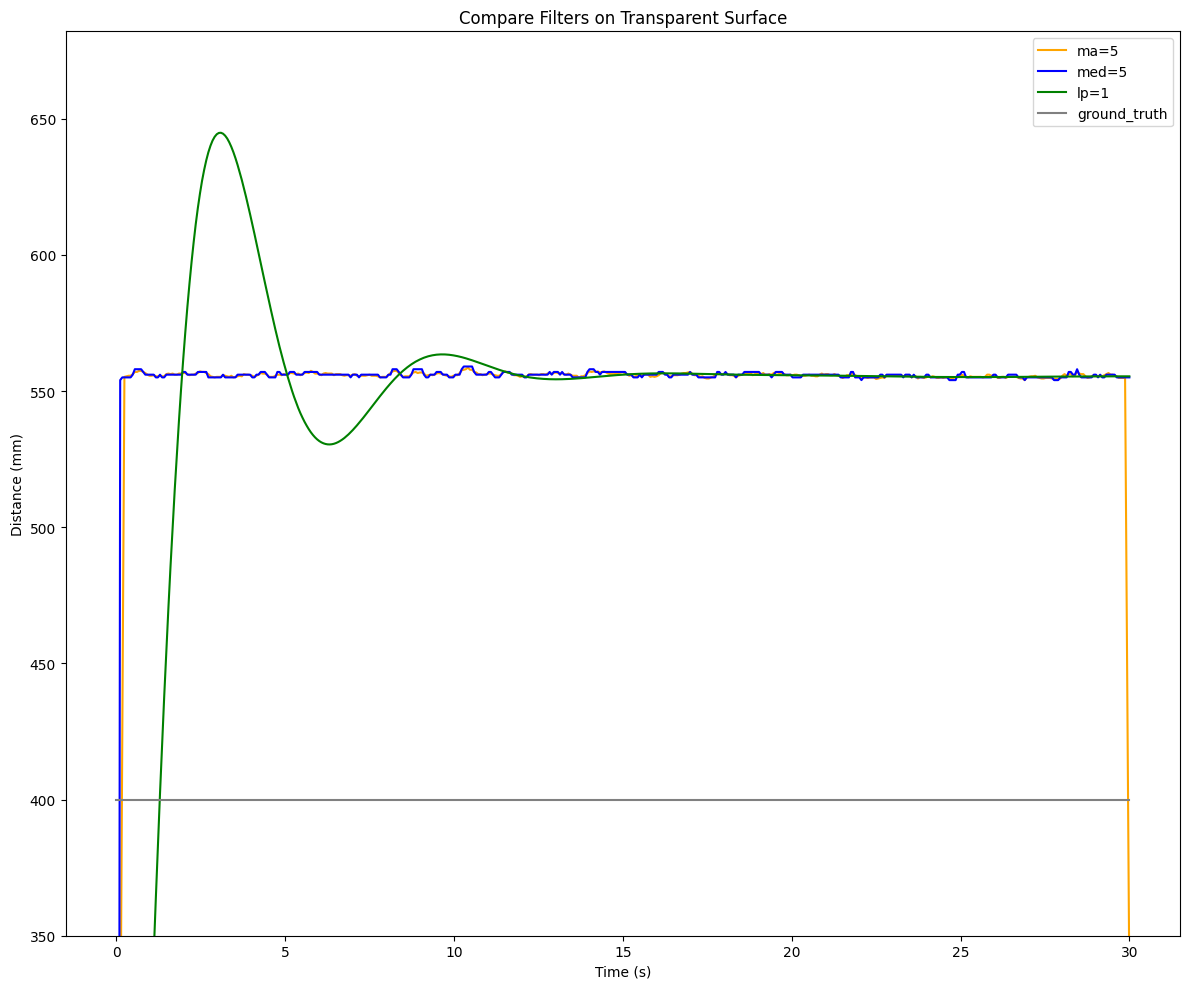

In [124]:
import numpy as np

plt.figure(figsize=(12, 10)) 
ground_truth = 400
gt_line = np.full_like(transparent['timestamp'], ground_truth, dtype=float)

plt.plot(transparent['elapsed_time'], transparent['tof_ma5'], label='ma=5', color='orange')
plt.plot(transparent['elapsed_time'], transparent['tof_med5'], label='med=5', color='blue')
plt.plot(transparent['elapsed_time'], transparent['tof_lp1'], label='lp=1', color='green')
plt.plot(transparent['elapsed_time'], gt_line, label='ground_truth', color='gray')

plt.title('Compare Filters on Transparent Surface')
plt.xlabel('Time (s)')
plt.ylabel('Distance (mm)')
plt.ylim(350, ) 
plt.legend()
plt.tight_layout()
plt.show()


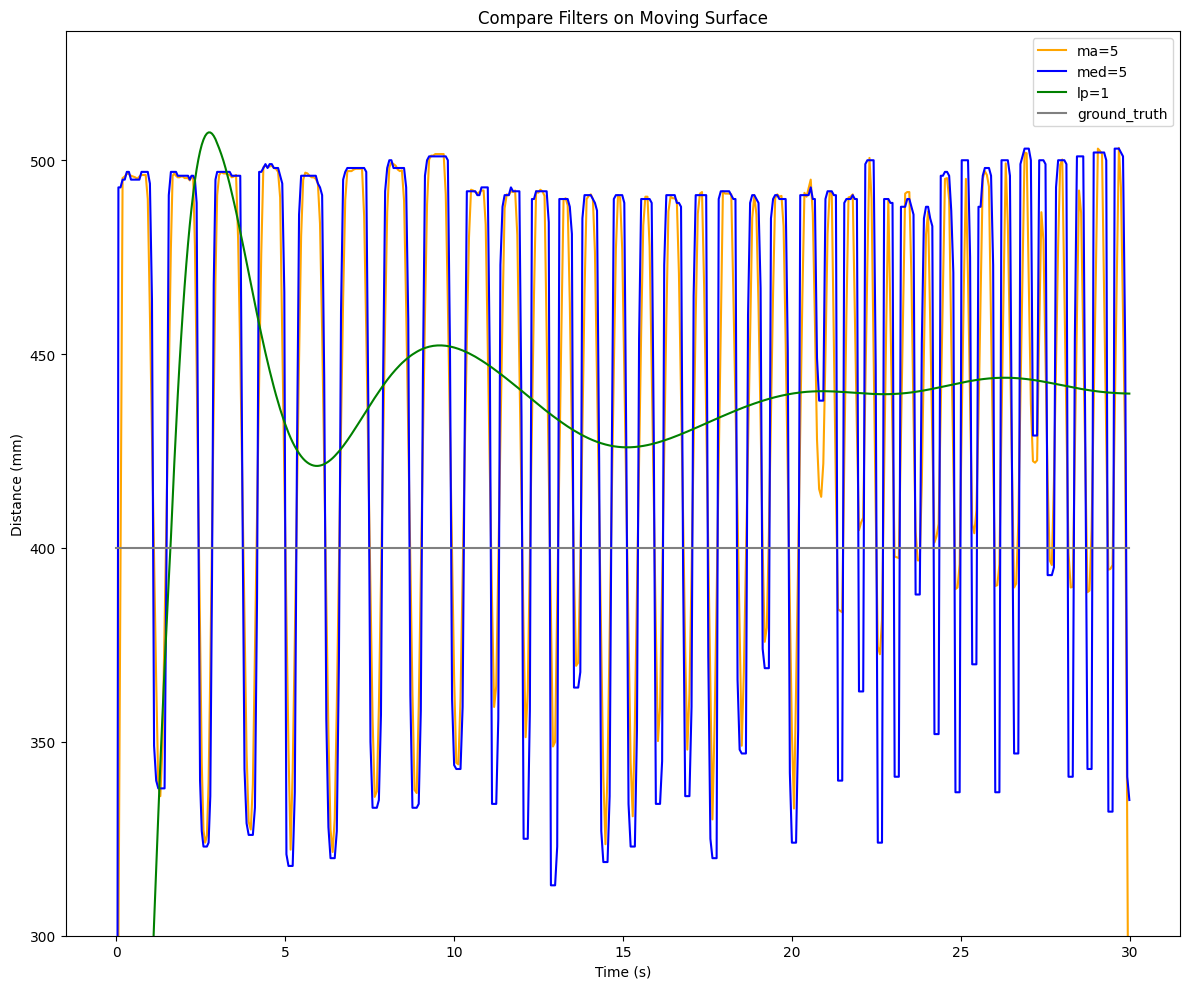

In [125]:
import numpy as np

plt.figure(figsize=(12, 10)) 
ground_truth = 400
gt_line = np.full_like(moving['timestamp'], ground_truth, dtype=float)

plt.plot(moving['elapsed_time'], moving['tof_ma5'], label='ma=5', color='orange')
plt.plot(moving['elapsed_time'], moving['tof_med5'], label='med=5', color='blue')
plt.plot(moving['elapsed_time'], moving['tof_lp1'], label='lp=1', color='green')
plt.plot(moving['elapsed_time'], gt_line, label='ground_truth', color='gray')

plt.title('Compare Filters on Moving Surface')
plt.xlabel('Time (s)')
plt.ylabel('Distance (mm)')
plt.ylim(300, ) 
plt.legend()
plt.tight_layout()
plt.show()